In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


from skimage.transform import radon, rescale

In [2]:
def radon_transform_polygon(pixel_number, n, r, *, brightcurve = False):
    """Returns a regular n-gon of dimensions of pixel_number and its corresponding sinogram obtained by Radon transform."""
    
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import radon, rescale
    
    # n = number of vertices of regular polygon (int >= 3)
    # r = circumradius of regular n-gon (positive float)
    
    # image with shape pixel_number * pixel_number
    image = np.zeros([pixel_number,pixel_number], dtype=float)

    # define xrange and yrange
    xrange = np.linspace(-pixel_number/2,pixel_number/2,pixel_number)
    yrange = np.linspace(-pixel_number/2,pixel_number/2,pixel_number)

    # define xvals and yvals using meshgrid
    xvals, yvals = np.meshgrid(xrange, yrange)

    # define zvals
    zvals = xvals + yvals * 1j

    # Exterior angle = alpha
    alpha = 2*np.pi/n

    # equation of lines forming regular n-gon
    lines1 = []
    for i in range(n):
        lines1.append(+np.sin(i*alpha)*yvals - np.cos(i*alpha)*xvals - r*np.cos(alpha/2))

    # logical array (linear programming)
    logical_array = np.full((pixel_number, pixel_number), True)
    for i in range(n):
        logical_array = logical_array & (lines1[i] <= 0)

    image[logical_array] = 1.0

    # Parametric coordinates
    theta_angle = np.linspace(0., alpha/2, max(image.shape)//n, endpoint=False)
    
    
    # Plotting object & sinogram
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

    ax1.set_title("Original image:\n Regular {}-gon with \n circumradius {}".format(n,r), fontsize = 15)
    ax1.imshow(image, cmap=plt.cm.Greys_r,
              extent=(-pixel_number/2, pixel_number/2, -pixel_number/2, pixel_number/2), aspect='equal')

    # discrete radon transform (number of angles = 180 deg/pixel no.)
    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta)
    dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
    ax2.set_title("Radon transform\n(Sinogram)", fontsize = 15)
    ax2.set_xlabel("Projection angle (degrees)", fontsize = 14)
    ax2.set_xticks([i*alpha*180.0/(2*np.pi) for i in range(n+1)])
    ax2.set_ylabel("Projection position (pixels)", fontsize = 14)
    ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
               extent=(-dx, 180.0 + dx, -sinogram.shape[0]/2 -dy, sinogram.shape[0]/2 + dy),
               aspect='auto')

    # Parametric curves for bright curves
    if brightcurve == True:
        if n%2 == 0:
            for i in range(1,n+1):
                for j in range(n//2):
                    ax2.plot((j*alpha + theta_angle)*180./np.pi, r*np.cos(theta_angle + (2*i-1)*alpha/2), 
                     color='red', linewidth = 1, linestyle = (0,(7,10)))
                    ax2.plot(((j+1)*alpha - theta_angle)*180./np.pi, r*np.cos(theta_angle + (2*i-1)*alpha/2), 
                     color='red', linewidth = 1, linestyle = (0,(7,10)))
        else:
            for i in range(1,n+1):
                for j in range(n//2):
                    ax2.plot((j*alpha + theta_angle)*180./np.pi, -r*np.cos(theta_angle + 2*(i-1)*alpha/2), 
                     color='red', linewidth = 1, linestyle = (0,(7,10)))
                    ax2.plot(((j+1)*alpha - theta_angle)*180./np.pi, -r*np.cos(theta_angle + 2*(i-1)*alpha/2), 
                     color='red', linewidth = 1, linestyle = (0,(7,10)))
                ax2.plot(((n-1)/2*alpha + theta_angle)*180./np.pi, -r*np.cos(theta_angle + 2*(i-1)*alpha/2), 
                         color='red', linewidth = 1, linestyle = (0,(7,10)))
    
    fig.tight_layout()
    plt.show()

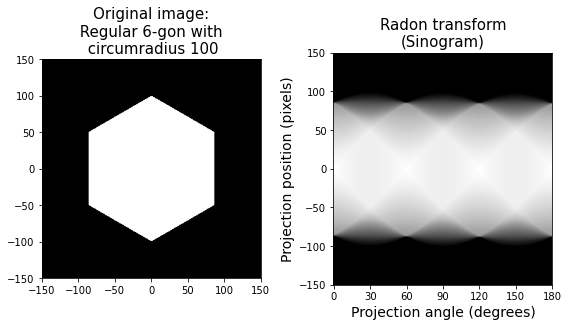

In [3]:
radon_transform_polygon(300, 6, 100)

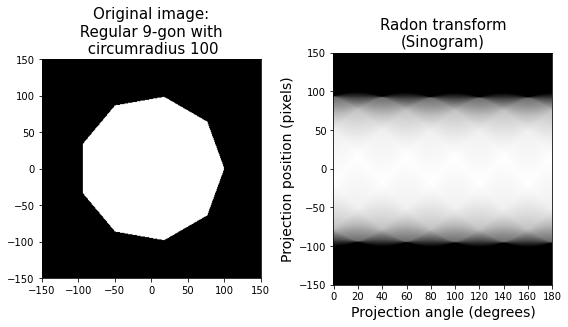

In [4]:
radon_transform_polygon(300, 9, 100)

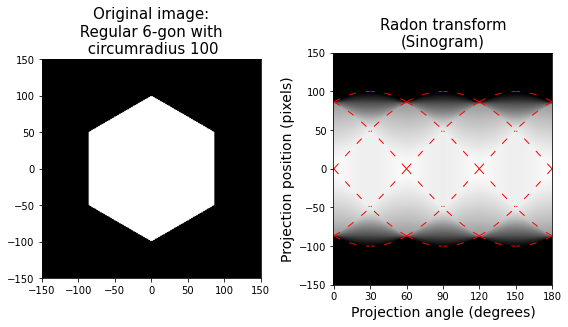

In [6]:
radon_transform_polygon(300, 6, 100, brightcurve = True)